In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from data_prep import data_prep
import get_model
import utils

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
dfreal = pd.read_csv('dataset\Biomass_Private.csv')

data_loader = data_prep()
data_loader.create_images(width=80, height=64)
selected_pix = data_loader.selected_pix
images = data_loader.get_images()
dfbio = data_loader.dfbio

In [3]:
# fig, axes = plt.subplots(2,4, figsize=(20,8))
# for i,image in enumerate(images):
#     axes.flatten()[i].imshow(image, cmap='gray')

In [4]:
model = get_model.Unet(dfbio, images)
X_train, y_train, X_val, y_val = model.prepare_data(fit=False)
history = model.eval(X_train, y_train, X_val, y_val)
# preds_image, preds_list = model.predict(selected_pix)

Epoch 1/200
2/2 [==============================] - 4s 503ms/step - loss: 64.2173 - val_loss: 44.5604 - lr: 0.0100
Epoch 2/200
2/2 [==============================] - 0s 165ms/step - loss: 63.1778 - val_loss: 1791.5739 - lr: 0.0100
Epoch 3/200
2/2 [==============================] - 0s 157ms/step - loss: 62.8084 - val_loss: 920.1601 - lr: 0.0100
Epoch 4/200
2/2 [==============================] - 0s 201ms/step - loss: 62.5044 - val_loss: 6061.4434 - lr: 0.0100
Epoch 5/200
2/2 [==============================] - 0s 184ms/step - loss: 62.1937 - val_loss: 3980.9385 - lr: 0.0100
Epoch 6/200
2/2 [==============================] - 0s 181ms/step - loss: 61.8783 - val_loss: 2799.1709 - lr: 0.0100
Epoch 7/200
2/2 [==============================] - 0s 167ms/step - loss: 61.5474 - val_loss: 1570.8018 - lr: 0.0100
Epoch 8/200
2/2 [==============================] - 0s 173ms/step - loss: 61.2041 - val_loss: 128.6926 - lr: 0.0100
Epoch 9/200
2/2 [==============================] - 0s 177ms/step - loss: 60.

0.001 100 200 3 : 29.3702  
0.01 - 6 : 26.7662  
0.01 50 100 150 6 : 29.487  
0.01 100 200 1 : 28.612  
0.01 100 200 300 3 : 26.425  
0.01 50 100 150 3 : 30.190
0.01 50 100 200 3 : 31.959 (bagus)  
0.01 50 100 150 200 3 : 28.905 (bagus)

In [ ]:
model = get_model.Unet(dfbio, images)
X_train, y_train = model.prepare_data(fit=True)
history = model.fit(X_train, y_train)

In [10]:
utils.save_model(model.model, 'Unet_200_31.132_val')

Save Successful!


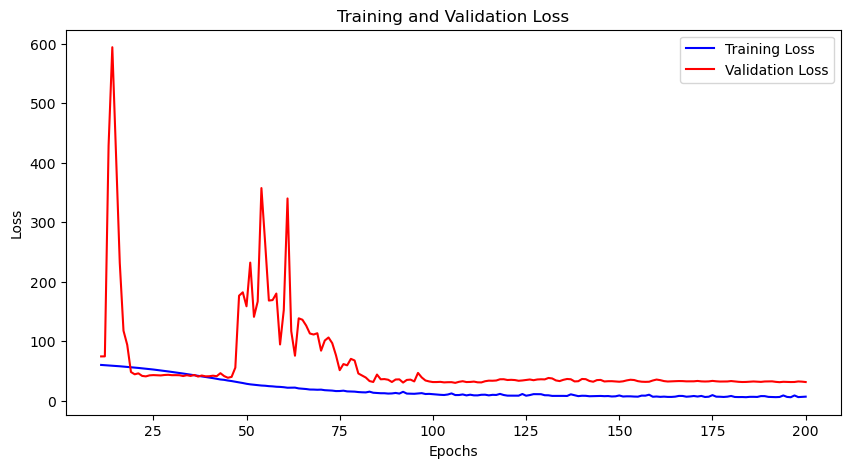

In [5]:
utils.plot_loss(history, val=True)

In [6]:
preds_image, preds_list = model.predict(selected_pix)

1/1 [==============================] - 0s 27ms/step


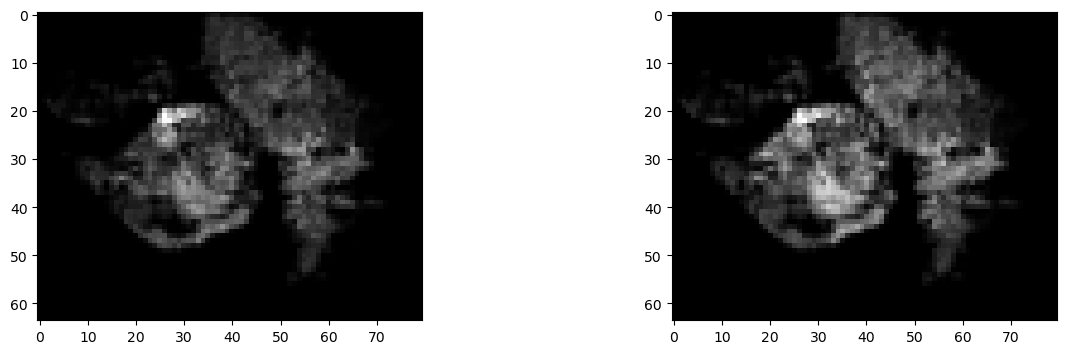

In [7]:
i=2
fig, axes = plt.subplots(1,2,figsize=(15,4))
axes[0].imshow(preds_image[0][0,:,:,0], cmap='gray')
axes[1].imshow(preds_image[1][0,:,:,0], cmap='gray')

In [8]:
np.sum(preds_list['2018']), np.sum(preds_list['2019'])

(306544.3, 328412.0)

In [9]:
utils.real_eval(dfreal, preds_list)

(30.651240259960534, 45.894744600554034)